In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier



In [2]:
completo = pd.read_csv("Datos_completos.csv")
completo

,index,Documento_Ingreso,Documento_Actual,Codigo,Apellido_1_Estudiante,Apellido_2_Estudiante,Nombres_Estudiante,Acceso,Subacceso,Correo_Institucional,...,Corte_3p,Nota_4to_Corte,Corte_4p,Nota_5to_Corte,Corte_5p,Nombre_completo,Correo,Grupo,usuario,Nota_final
0,0,221123,44867,751433,-,-,alcjobxj,Nuevo al programa,Bachillerato con Examen de Estado,alcjobxj@urosario.edu.co,...,20,3.7,15,4.0,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,3.855
1,1,166515,40599,749859,-,-,orhawgyi,Termino condición doble programa,GENERAL,orhawgyi@urosario.edu.co,...,20,3.5,15,3.5,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,3.820
2,2,133161,98669,31366,-,-,mdfaizgp,Doble Programa,GENERAL,mdfaizgp@urosario.edu.co,...,20,3.9,15,3.6,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,4.225
3,3,164862,25568,111363,-,-,mwuaqnnz,Extranjero,GENERAL,mwuaqnnz@urosario.edu.co,...,20,3.5,15,3.8,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,3.575
4,4,879672,73231,667248,-,-,pgooxicb,Doble Programa,Departamento de Admisiones,pgooxicb@urosario.edu.co,...,20,2.6,15,2.7,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,2.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1315,515977,27417,126984,-,-,jnkgwinp,Extranjero,GENERAL,jnkgwinp@urosario.edu.co,...,20,2.6,15,2.4,25,Lazaro Ramirez,lazaro.ramirez@urosario.edu.co,1,lazaro.ramirez,2.230
1250,1316,989769,86022,706697,-,-,llnuonlp,Reingreso por Fortalecimiento académico,GENERAL,llnuonlp@urosario.edu.co,...,20,3.1,15,2.2,25,Lazaro Ramirez,lazaro.ramirez@urosario.edu.co,1,lazaro.ramirez,2.755
1251,1317,480565,94961,29130,-,-,xrszqdqk,Termino condición doble programa,Departamento de Admisiones,xrszqdqk@urosario.edu.co,...,20,2.5,15,2.4,25,Lazaro Ramirez,lazaro.ramirez@urosario.edu.co,1,lazaro.ramirez,2.695
1252,1318,43699,8785,130825,-,-,tskxxthh,Termino condición doble programa,Departamento de Admisiones,tskxxthh@urosario.edu.co,...,20,2.7,15,2.6,25,Lazaro Ramirez,lazaro.ramirez@urosario.edu.co,1,lazaro.ramirez,2.655


%%latex
\usepackage{amsmath,amssymb,amsfonts}



### Tareas
1. Leer paper https://reader.elsevier.com/reader/sd/pii/S0360131516301634?token=DB86640804CC9FE6B7FB5B1D080396823D2094FD36E393FA33E1D62F8CCB331555272C9D164BCAFA28296E5B1C692630
2. Ver cada uno sus modelos teoricos (Escribirlos aca en latex en español), y despues aplicarlo a la base de datos completos (Hecho - Falta Decision Tree)
3. Reunion Lunes para explicarle al otro los modelos y la aplicación (Hecho)
4. Hacer modelo por cada materia y si es posible que dependa de las notas obtenidas anteriormente en las pre-requisito.
5. Generar distribución notas a partir de la base de datos de notas
6. Sacar $F_{1.5}$, medidas precision

Preguntas:
1. Como podemos generar la distribucion de notas
2. Hasta que corte seria ideal la alerta


Ruiz : K-Nearest, Decision Tree
Miguel : Regresion Logistica y Clasificador bayesiano

## Notas Paper Miguel

* Que el estudiante sepa del modelo predictivo podria considerarse malo, ya que él podria creer que sus notas futuras ya estan predichas por el modelo. Luego seria ideal que solo lo supiera el administrador
* Utilizaron tres notas de examenes como indicadores del performance durante el semestre. Asi como el GPA acumulativo fue tenido en cuenta y las notas en las materias pre-requisito de la materia.
* Las primeras notas del semestre tienden a ser muy buenas predictoras de como van a ser el rendimiento del estudiante de la materia
* Plantean que es mejor crear un modelo por cada materia que uno generalizado
* Recomiendan este libro para ver los metodos: "Principle of Data Mining,D.J. Hand, H. Mannila and P. Smyth MIT press, New York (2001)", Link : https://www.researchgate.net/publication/220688376_Principles_of_Data_Mining (Se ve como bueno)
* Calculan la precisión del modelo de los que pasaron con los que no, para encontrar un mejor modelo que prediga mejor a los malos. Si fueran unidos podria que un modelo diera menos errores en general pero que falle muchisimo en los malos estudiantes , lo cual seria un problema. Tambien calcularon un $F_{1.5}$ puntaje que le da mas peso a los estudiantes que fallaron que los que pasaron.
* Utilizaron el coeficiente de Pearson para saber que tan corelacionadas estaban las variables explicativas, si pasaba de 0,3 las escogian. (Podriamos hacer eso)
* Parece que es necesario acotar el numero de estudiantes de los datos de entrenamiento, para que el modelo no se descarrile. (Recordad base Juan F el numero de notas varia mucho).
* Falso negativo : No identificar estudiantes que se encontraban en riesgo.
* Termina siendo mejor haciendo un modelo combinado de otros modelos (Ensemble).

## K-Nearest Neighbours



K-Nearest Neighbours (KNN) es un modelo de aprendizaje supervisado. Se necesita de etiquetas de cada uno de los estudiantes en cada uno de los cortes o con el promedio final.



In [3]:
#Se selecciona el nombre de una asignatura
materia = completo[completo["Nombre_Asignatura"]=="Algebra lineal"]
materia

,index,Documento_Ingreso,Documento_Actual,Codigo,Apellido_1_Estudiante,Apellido_2_Estudiante,Nombres_Estudiante,Acceso,Subacceso,Correo_Institucional,...,Corte_3p,Nota_4to_Corte,Corte_4p,Nota_5to_Corte,Corte_5p,Nombre_completo,Correo,Grupo,usuario,Nota_final
66,66,221123,44867,751433,-,-,alcjobxj,Nuevo al programa,Bachillerato con Examen de Estado,alcjobxj@urosario.edu.co,...,20,3.4,15,4.3,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,3.905
67,67,166515,40599,749859,-,-,orhawgyi,Termino condición doble programa,GENERAL,orhawgyi@urosario.edu.co,...,20,3.4,15,4.2,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,4.040
68,68,133161,98669,31366,-,-,mdfaizgp,Doble Programa,GENERAL,mdfaizgp@urosario.edu.co,...,20,4.2,15,4.7,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,4.305
69,69,164862,25568,111363,-,-,mwuaqnnz,Extranjero,GENERAL,mwuaqnnz@urosario.edu.co,...,20,3.3,15,3.7,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,3.560
70,70,879672,73231,667248,-,-,pgooxicb,Doble Programa,Departamento de Admisiones,pgooxicb@urosario.edu.co,...,20,2.6,15,2.5,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,127,515977,27417,126984,-,-,jnkgwinp,Extranjero,GENERAL,jnkgwinp@urosario.edu.co,...,20,2.6,15,2.1,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.395
128,128,989769,86022,706697,-,-,llnuonlp,Reingreso por Fortalecimiento académico,GENERAL,llnuonlp@urosario.edu.co,...,20,2.9,15,2.2,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.505
129,129,480565,94961,29130,-,-,xrszqdqk,Termino condición doble programa,Departamento de Admisiones,xrszqdqk@urosario.edu.co,...,20,2.7,15,3.3,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.630
130,130,43699,8785,130825,-,-,tskxxthh,Termino condición doble programa,Departamento de Admisiones,tskxxthh@urosario.edu.co,...,20,3.0,15,3.0,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.500


Se selecciona el dataframe (o matriz) con las variables de interés

In [4]:
#X = np.array(list(zip(x,y)))
X = materia[["Nota_1er_Corte","Nota_2do_Corte"]]

## Análisis con KNN

In [5]:
def funcion_paso(x):
    #x nota final
    #return si paso o perdio como etiquetas para modelos de predicción
    if(x >= 3):
        return 1
    elif(x <3):
        return 0

In [6]:
#materia = completo[completo["Nombre_Asignatura"]=="Algebra lineal"]
materia["Paso"] = materia.apply(lambda row: funcion_paso(row["Nota_final"]),axis=1 )
my_labels = materia["Paso"]

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
# Separacion de los datos de prueba y datos de entrenamiento
X_train,X_test,Y_train,Y_test=train_test_split(X,my_labels)

In [8]:
n = 2 # numero de grupos, i.e., paso o no paso
knn = KNeighborsClassifier(n_neighbors=n)

In [9]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
knn.score(X_test,Y_test) # Si es 1 es demasiado bueno

0.8823529411764706

In [11]:
y_pred=knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8823529411764706


In [12]:
# Prediciendo a partir de nuevos registros  de la misma dimension a los registros con los que se entrenó el modelo
Y_pred = knn.predict(X_test)

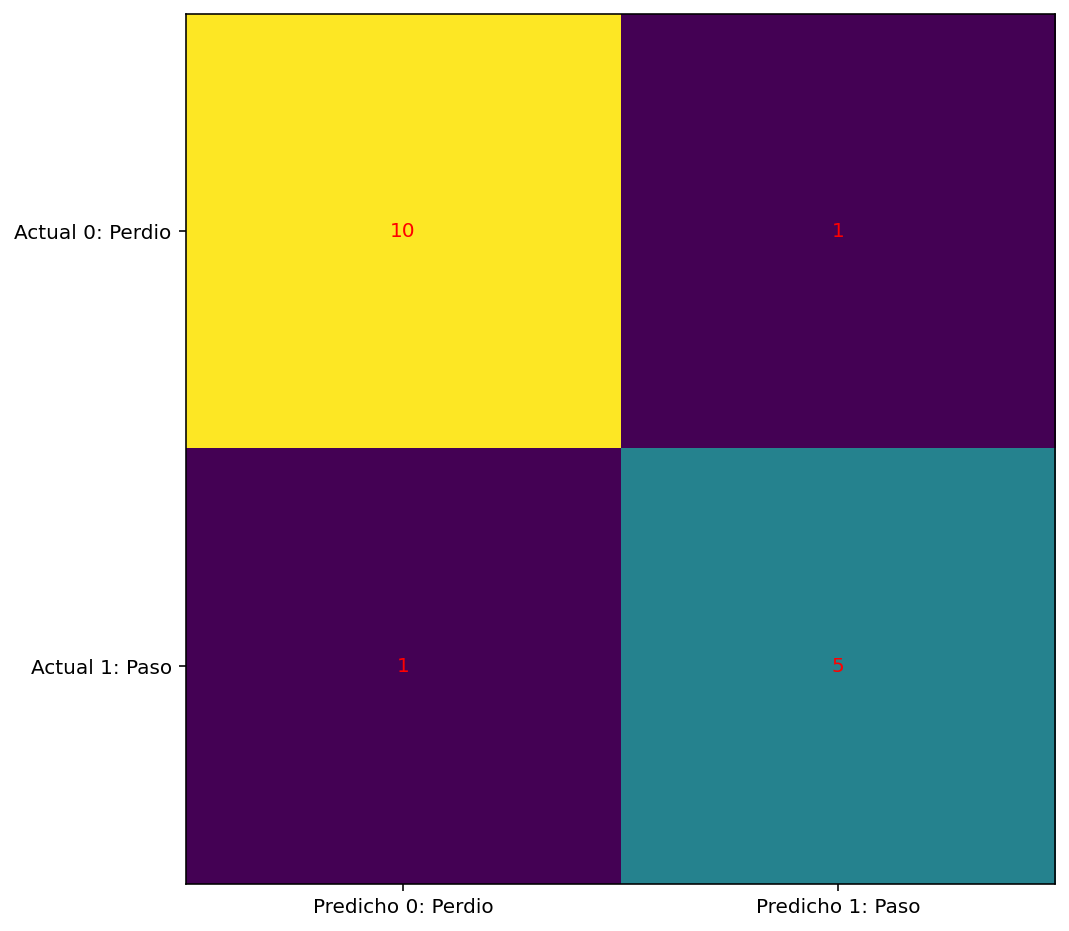

In [13]:
# Matriz de confusion
cm = confusion_matrix(Y_test,Y_pred,labels = [0, 1])

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [14]:
# Reporte de precision del modelo KNN:
print(classification_report(Y_test,Y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.83      0.83      0.83         6

    accuracy                           0.88        17
   macro avg       0.87      0.87      0.87        17
weighted avg       0.88      0.88      0.88        17



# Conclusion de modelos KNN y KMC a partir de estudiantes con resultados buenos y malos
Los puntajes Elbow score y Silhouette score mostraron que 2 clusters es el mejor valor para hacer la clasificación de los datos. Como esta clasificación tiene en cuenta tanto las notas buenas como las malas se va a examinar ahora como fue la clasificación para los resultados malos y como se puede mejorar estas clasificaciones.

## Clasificador Bayesiano

* *Probabilidad Condicional* : $P(Pase \ algo | dado \ que \ paso \ algo)$
* *Probabilidad a Priori*: Probabilidad de un caso dividido por el numero total de casos.

**Definición**

Dado un conjunto de clasificaciones mutualmente exclusivo y exhaustivo de classificaciones $c_1,c_2,c_k$, las cuales poseen probabilidades a priori $P(c_1),P(c_2),...,P(c_k)$ respectivamente, y $n$ atributos $a_1,a_2,...,a_n$ para los cuales dada una instancia(record/registro) posee valores $v_1,v_2,...,v_n$ respectivamente, la probabilidad posterior de la clase $c_i$ que ocurre para la estancia especificad puede ser mostrada proporcionalmente a :

\begin{equation*}
    P(c_i) \times P(a_1=v_1 \ y \ a_2=v_2... \ y \ a_n=v_n|c_i)
\end{equation*}

Suponiendo que la probabilidad de los atributos son independientes (Generalmente no pasa, pero sigue funcionando), el valor de esta expresión puede ser calculado utilizando el producto.
\begin{equation*}
    P(c_i) \times P(a_1=v_1|c_i) \times P(a_2=v_2|c_i) \times P(a_3=v_3|c_i) \times P(a_3=v_3|c_i) \times
\end{equation*}

Se calcula este producto por cada valor de $i \in [k]$ (Es decir cada clase) y se elige la clasificacion que posee el valor mas grande.

__________________________________________________________________________

Esta ultima expresión es escrita aveces como $P(C_i)\times \prod_{j=1}^n P(a_j=v_j | class =c_i)$. La suma de estas probabilidades no da 1, sin embargo se puede nomr

In [15]:
materia["Nota_final"]

66     3.905
67     4.040
68     4.305
69     3.560
70     2.815
       ...  
127    2.395
128    2.505
129    2.630
130    2.500
131    2.670
Name: Nota_final, Length: 66, dtype: float64

In [23]:
X = materia[["Nota_1er_Corte"]]
Y= materia["Paso"]

In [24]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


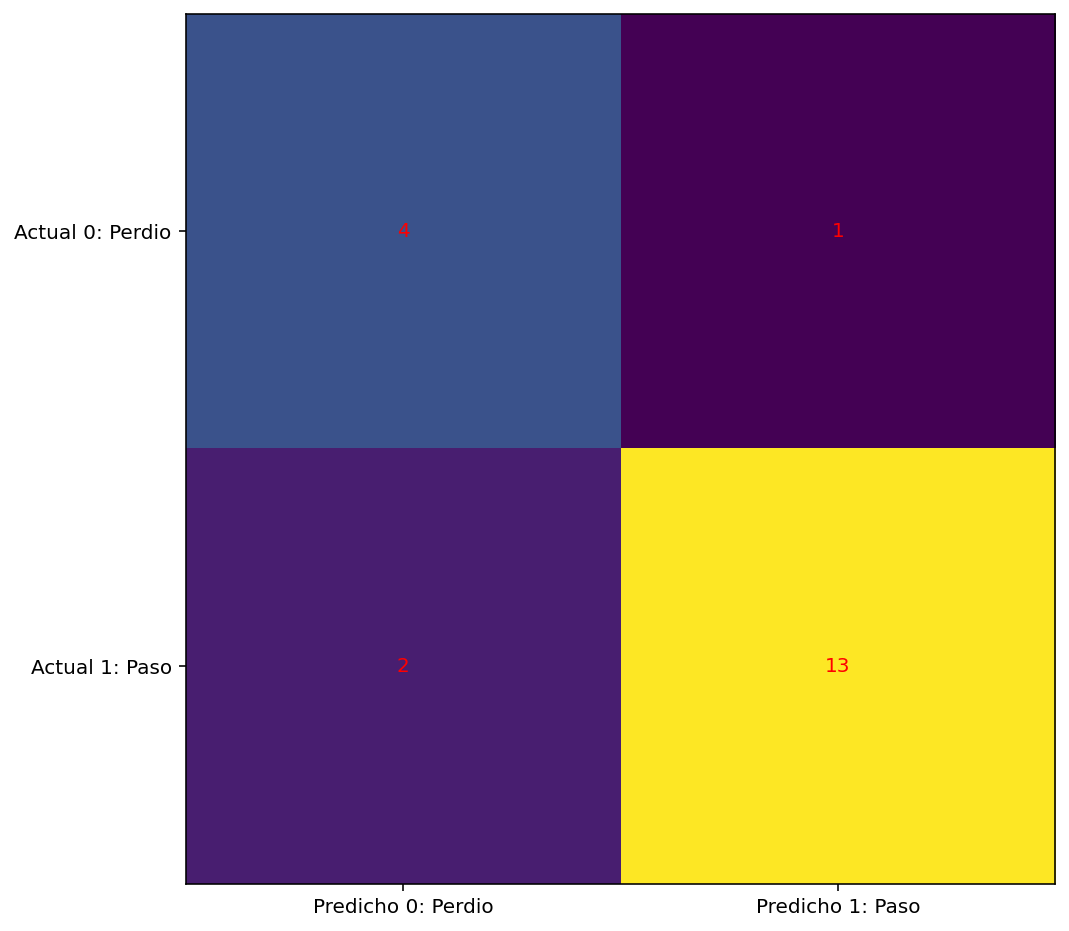

In [25]:
cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Regresion Logistica

La regresión logitica trabaja con posibilidades en vez de proporciones. Las posibilidades es simplemente la division/radio de proporción de los dos posibles resultados. Si $p$ es la proporcion de un resultado y $1-p$ la proporción del segundo resultado:

\begin{equation*}
    posibilidades = \frac{p}{1-p}
\end{equation*}

La regresión logistica modela las posibilidades en terminos de variables explicativas. Es decir:

\begin{equation*}
    log(\frac{p}{1-p}) = B_0+B_1x
\end{equation*}

Las probabilidades son estimadas con la función sigmoide $p(x)=\frac{1}{1+exp(-f(x_1,x_2))}$

In [26]:
model = LogisticRegression(solver='liblinear')

In [27]:
result = model.fit(X_train,y_train)

In [28]:
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


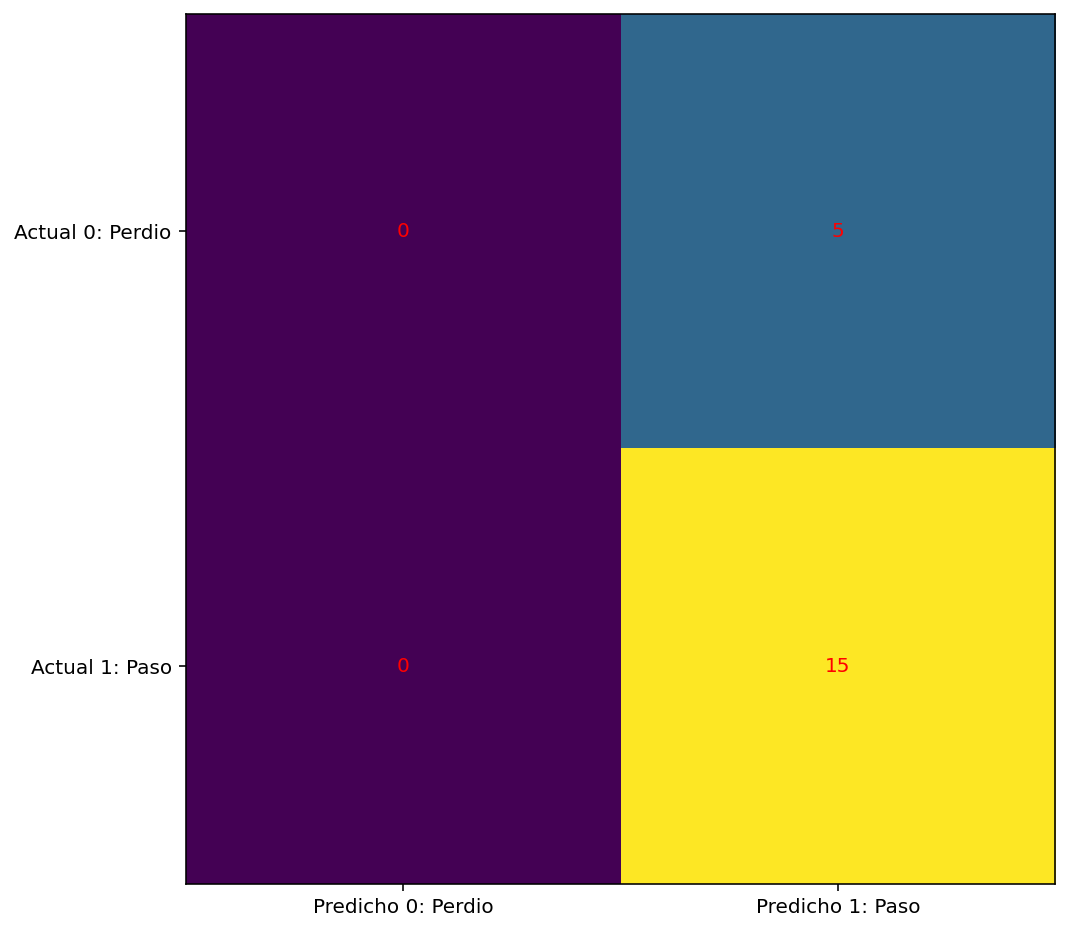

In [29]:
cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [30]:
confusion_matrix(y_test,y_pred)

array([[ 0,  5],
       [ 0, 15]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree
Un árbol de decisión es una árbol en la que cada nodo interno representa un "test" de un atributo. Cada rama representa el resultado del test y cada hoja del árbol representa una etiqueta de un grupo. Los caminos desde la raíz hasta la as hojas representan las reglas de clasificación.

In [35]:
# Separating train data and split data
X_train, X_test, y_train, y_test = train_test_split(X,my_labels,test_size = 0.3, random_state = 100)

In [36]:
# Creating the classifier object
tree_clf = DecisionTreeClassifier(criterion = "gini",max_depth = 10,min_samples_leaf=5)

In [37]:
# Performing training
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
# Prediction on test with giniIndex
y_pred = tree_clf.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


In [39]:
# Calculations of accuracy

# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
# Accuracy score of the model
print("Accuracy: ",accuracy_score(y_test,y_pred))
# Reporte
print(classification_report(y_test, y_pred))

Accuracy:  0.8
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.93      0.82      0.87        17

    accuracy                           0.80        20
   macro avg       0.67      0.75      0.69        20
weighted avg       0.85      0.80      0.82        20



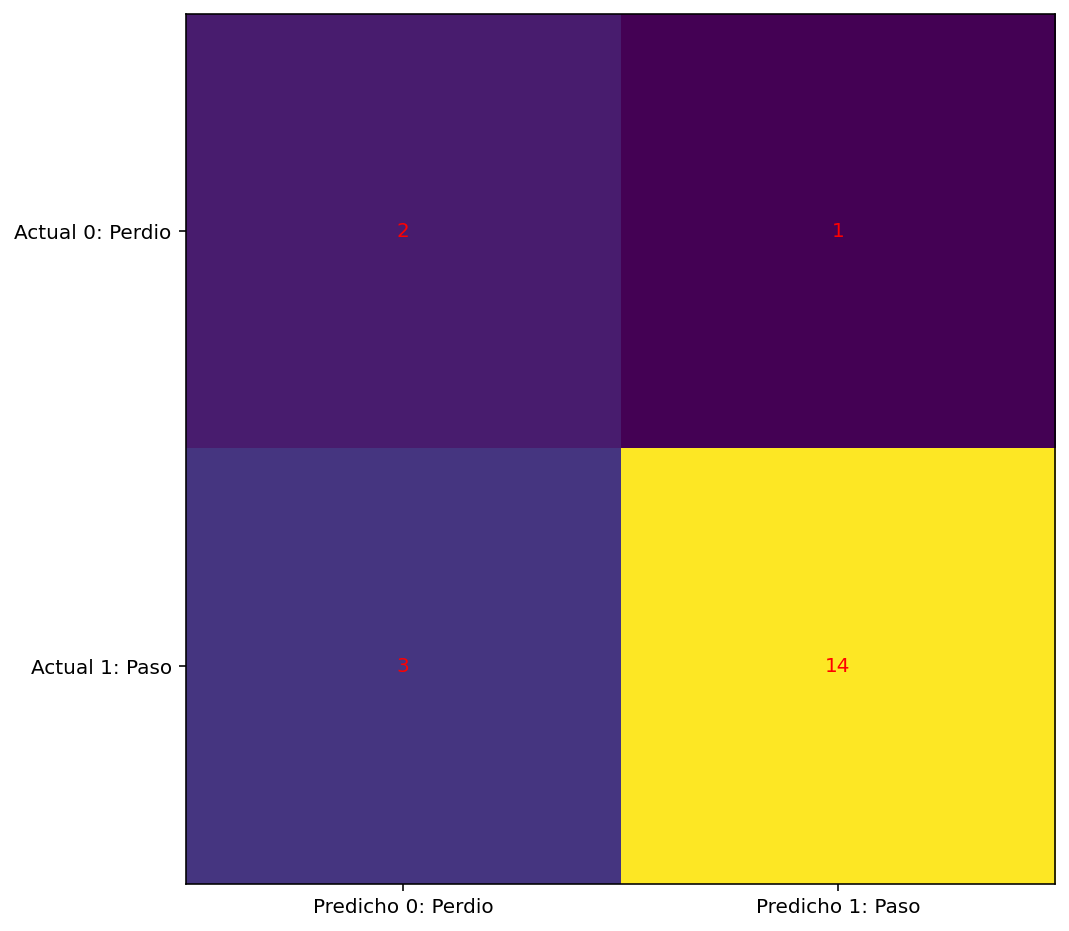

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [41]:
from math import log

def calculateEntropy(dataSet):
  number = len(dataSet)
  labelCounts = {}
  for featureVector in dataSet:
    currentLabel = featureVector[-1]
    if currentLabel not in labelCounts.keys():
      labelCounts[currentLabel] = 0
    labelCounts[currentLabel] +=1
  entropy = 0
  for i in labelCounts:
    probability = float(labelCounts[keys])/number
    entropy -=probability*log(probability,2)
  return entropy

In [42]:
calculateEntropy(X)

NameError: name 'keys' is not defined

## Medidas de precisión para estudiantes con riesgo de perdida

In [44]:
cm = confusion_matrix(Y_test,Y_pred,labels = [0, 1])
cm

array([[10,  1],
       [ 1,  5]])

In [53]:
True_posit=cm[0][0]
True_neg=cm[1][1]
False_neg=[1][0]
False_posit=cm[0][1]
Total = True_posit+True_neg+False_neg+False_posit
print(True_posit,True_neg,False_neg,False_posit)

10 5 1 1


Verdaderos Positivos : Estudiantes que perdieron y fueren identificado como en riesgo.

Verdadero Negativos : Estudiantes que pasaron y no fueron identificados como en riesgo.

Falsos negativos (Tipo II error): Es el numero de estudiantes que perdieron el curso y no fueron identificados por los modelos de riesgo.

Flsos positivos (Tipo I error): el numero de estudiantes que pasaron el curso y fueron identificados como en riesgo.


In [60]:
Accuracy = (True_posit+True_neg)/Total
print("Acurracy:" +str(Accuracy))
Accuracy_pass = (True_neg)/(True_neg+False_posit)
print("Acurracy (Pass):" +str(Accuracy_pass))
Accuracy_fail = (True_posit)/(True_posit+False_neg)
print("Acurracy (Fail):" +str(Accuracy_fail))
F15=((1+1.5*1.5)*True_posit)/((1+1.5*1.5)*True_posit+(1.5*1.5)*False_neg+False_posit)
print("F_{1.5}$:" +str(F15))

Acurracy:0.8823529411764706
Acurracy (Pass):0.8333333333333334
Acurracy (Fail):0.9090909090909091
F_{1.5}$:0.9090909090909091


Accuracy (Pass): Precision de los estudiantes que pasaron.

Accuracy (Fail): Precision de los estudiantes que fallaron.

$F_{1.5}$ : Puntaje que mida la combinacion de las dos precisiones dandole mas peso a los estudiantes que perdieron.